In [316]:
import csv
import numpy as np
import math
import matplotlib.pyplot as plt
import string
import random
import scipy
import time

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import accuracy_score

N = 200000
alphabet = string.ascii_lowercase + '#' + '.'
D = len(alphabet)
z = np.ones(N)

RI_pres = np.random.rand(D, N)
RI_pres = np.where(RI_pres>0.5, 1, -1)

RI_past = np.random.rand(D, N)
RI_past = np.where(RI_past>0.5, 1, -1)

def ngram_encode(ngram_str, letter_vecs, window=3):
    vec = np.zeros(letter_vecs.shape[1])
    
    full_str = '#' + ngram_str + '.'
    
    
    for il, l in enumerate(full_str[:-(window-1)]):
        trivec = letter_vecs[alphabet.find(full_str[il]), :]
        for c3 in range(1, window):
            trivec = trivec * np.roll(letter_vecs[alphabet.find(full_str[il+c3]), :], c3)
            
        vec += trivec
    return vec

def ngram_encode_cl(ngram_str, letter_vecs, window=3):
    vec = np.zeros(letter_vecs.shape[1])
    
    full_str = '#' + ngram_str + '.'
    
    for il, l in enumerate(full_str[:-(window-1)]):
        trivec = letter_vecs[alphabet.find(full_str[il]), :]
        for c3 in range(1, window):
            trivec = trivec * np.roll(letter_vecs[alphabet.find(full_str[il+c3]), :], c3)
            
        vec += trivec
    return 2* (vec + 0.1*(np.random.rand(letter_vecs.shape[1])-0.5) < 0) - 1

def encodes(words, past_tense):
    seen = []
    for i in range(len(words)):
        enc = ngram_encode_cl(words[i], RI_pres, 3)
        enc_past = ngram_encode_cl(past_tense[i], RI_past, 3)
        seen.append((enc, enc_past))
    return seen

def map_train(encoded, reg=1):
    total_vec = np.zeros(N) #psi
    for i in range(len(encoded)):
        total_vec += np.multiply(encoded[i][0], encoded[i][1])
    return total_vec

def perceptron_map_train(encoded):
    #print N
    total_vec = np.zeros(N) #psi
    for i in range(len(encoded)):
        # if predict correctly, add to total_vec with a smaller weight
        train_pred, random_pred = sim(total_vec, [encoded[i]])
        if train_pred > random_pred:
            total_vec += ((N-train_pred)/float(N)) * np.multiply(encoded[i][0], encoded[i][1])
        else:
            total_vec += np.multiply(encoded[i][0], encoded[i][1])
    return total_vec

def sim(model, encoded):
    data1, data3 = np.zeros(len(encoded)), np.zeros(len(encoded))
    total1, total3, count = 0, 0, 0
    
    random_vecs = np.random.randn(len(encoded), N)
    
    for j in range(len(encoded)):
        pair = encoded[j]
        sim1 = np.dot(np.multiply(model, pair[0]), pair[1])
        total1 += sim1

        sim3 = np.dot(np.multiply(model, random_vecs[j,:]), pair[0])
        total3 += sim3

        count += 1
        data1[j] = sim1 #total1/float(count)
        data3[j] = sim3 #total3/float(count)

    return data1, data3

def graph(train_func, encoded, test_encoded, stepsize=1):
    test_m = np.arange(1, len(encoded), stepsize)

    train_dot = np.zeros_like(test_m)
    test_dot = np.zeros_like(test_m) # np.zeros(test_m.shape)
    random_dot = np.zeros_like(test_m)

    for im, m in enumerate(test_m):
        map_model = train_func(encoded[:int(m)])
        d1, d3 = sim(map_model, encoded[:int(m)])
        d2, d4 = sim(map_model, test_encoded)
        train_dot[im] = d1.mean()
        test_dot[im] = d2.mean()
        random_dot[im] = d3.mean()

    plt.figure()
    plt.plot(test_m, train_dot)
    plt.plot(test_m, random_dot)
    plt.plot(test_m, test_dot)
    plt.show()

def read_csv(filepath):
    rows = []
    with open(filepath, 'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            rows.append(row)
    return rows

In [243]:
# past is encoded
# no shuffling yet
past_tense = open("wickle_train/ed1000.txt", 'r').read().strip().split()
words = [pt[:len(pt)-2] for pt in past_tense]

test_past_tense = past_tense[:100]
test_words = words[:100]

past_tense = past_tense[100:]
words = words[100:]

In [244]:
encoded = encodes(words, past_tense)
test_encoded = encodes(test_words, test_past_tense)


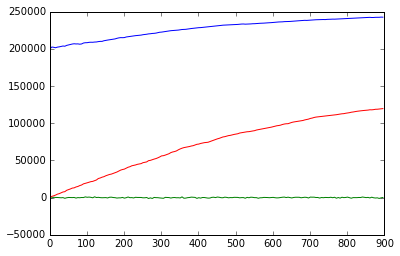

In [274]:
graph(perceptron_map_train, encoded, test_encoded, stepsize=5)

In [60]:
total_vec = perceptron_map_train(encoded)

In [245]:
idx = 51
print words[idx], past_tense[idx]
np.dot(total_vec * encoded[idx][0], encoded[idx][1])

leap leaped


ValueError: operands could not be broadcast together with shapes (100000,) (200000,) 

In [ ]:
words[51]

In [35]:
from pylab import *

def ngram_encode(ngram_str, letter_vecs, alph):
    vec = np.zeros(letter_vecs.shape[1])
    
    full_str = '#' + ngram_str + '.'
    
    
    for il, l in enumerate(full_str[:-2]):
        trivec = letter_vecs[alph.find(full_str[il]), :]
        for c3 in range(1, 3):
            trivec = trivec * np.roll(letter_vecs[alph.find(full_str[il+c3]), :], c3)
            
        vec += trivec
    return vec

def ngram_encode_cl(ngram_str, letter_vecs, alph):
    vec = ngram_encode(ngram_str, letter_vecs, alph)
    
    return 2* (vec + 0.1*(np.random.rand(letter_vecs.shape[1])-0.5) > 0) - 1
    

In [264]:
mst=0
men=900
M=men-mst

total_vec = perceptron_map_train(encoded[mst:men])

200000


In [265]:
idx = 51
print words[idx], past_tense[idx]
np.dot(total_vec * encoded[idx][0], encoded[idx][1])

leap leaped


250162.58204649034

In [266]:
letter_vecs = RI_past
#letter_vecs = 2 * (np.random.randn(D, N) < 0) - 1

bound_vec = total_vec * encoded[idx][0]

#ngram_str = 'powers'
#bound_vec = ngram_encode(ngram_str, letter_vecs, alph)
#bound_vec = ngram_encode_cl(ngram_str, letter_vecs, alph)

# initializing the states as random works just as well as the intention, which
# is to initialize as the superposition of all D states.
l0_state = np.random.randn(N)
l1_state = np.random.randn(N)
l2_state = np.random.randn(N)
l3_state = np.random.randn(N)
l4_state = np.random.randn(N)
l5_state = np.random.randn(N)
l6_state = np.random.randn(N)
l7_state = np.random.randn(N)

l1_state = np.dot(letter_vecs.T, np.dot(l1_state, letter_vecs.T))
l2_state = np.dot(letter_vecs.T, np.dot(l2_state, letter_vecs.T))
l3_state = np.dot(letter_vecs.T, np.dot(l3_state, letter_vecs.T))
l4_state = np.dot(letter_vecs.T, np.dot(l4_state, letter_vecs.T))
l5_state = np.dot(letter_vecs.T, np.dot(l5_state, letter_vecs.T))
l6_state = np.dot(letter_vecs.T, np.dot(l6_state, letter_vecs.T))
l7_state = np.dot(letter_vecs.T, np.dot(l7_state, letter_vecs.T))

# the clipping non-linearity will lead to arbitrary norms, so need to keep vector normalized
l1_state = l1_state/norm(l1_state)
l2_state = l2_state/norm(l2_state)
l3_state = l3_state/norm(l3_state)
l4_state = l4_state/norm(l4_state)
l5_state = l5_state/norm(l5_state)
l6_state = l6_state/norm(l6_state)
l7_state = l7_state/norm(l7_state)

# we know the first letter
l0_state = letter_vecs[alph.find('#'), :]


n_steps = 300

l1_coef_hist = np.zeros((n_steps, D))
l2_coef_hist = np.zeros((n_steps, D))
l3_coef_hist = np.zeros((n_steps, D))
l4_coef_hist = np.zeros((n_steps, D))
l5_coef_hist = np.zeros((n_steps, D))
l6_coef_hist = np.zeros((n_steps, D))
l7_coef_hist = np.zeros((n_steps, D))

In [267]:
for i in range(n_steps):
    l1_coef_hist[i, :] = np.dot(letter_vecs, l1_state)
    l2_coef_hist[i, :] = np.dot(letter_vecs, l2_state)
    l3_coef_hist[i, :] = np.dot(letter_vecs, l3_state)
    l4_coef_hist[i, :] = np.dot(letter_vecs, l4_state)
    l5_coef_hist[i, :] = np.dot(letter_vecs, l5_state)
    l6_coef_hist[i, :] = np.dot(letter_vecs, l6_state)
    l7_coef_hist[i, :] = np.dot(letter_vecs, l7_state)

    ## Need to make sure that the largest absolute value is always positive,
    ## because the unbinding inference can flip 2 and be the same
    
    mx1idx = np.argmax(np.abs(l1_coef_hist[i,:]))
    l1_state = l1_state * np.sign(l1_coef_hist[i, mx1idx])
    #l1_coef_hist[i, :] *= np.sign(l1_coef_hist[i, mx1idx])
    
    mx2idx = np.argmax(np.abs(l2_coef_hist[i,:]))
    l2_state = l2_state *  np.sign(l2_coef_hist[i, mx2idx])
    #l2_coef_hist[i, :] *= np.sign(l2_coef_hist[i, mx1idx])
    
    mx3idx = np.argmax(np.abs(l3_coef_hist[i,:]))
    l3_state = l3_state * np.sign(l3_coef_hist[i, mx3idx])
    #l3_coef_hist[i, :] *= np.sign(l3_coef_hist[i, mx1idx])
    
    mx4idx = np.argmax(np.abs(l4_coef_hist[i,:]))
    l4_state = l4_state * np.sign(l4_coef_hist[i, mx4idx])
    #l4_coef_hist[i, :] *= np.sign(l4_coef_hist[i, mx1idx])
    
    mx5idx = np.argmax(np.abs(l5_coef_hist[i,:]))
    l5_state = l5_state * np.sign(l5_coef_hist[i, mx5idx])
    #l5_coef_hist[i, :] *= np.sign(l5_coef_hist[i, mx1idx])
    
    mx6idx = np.argmax(np.abs(l6_coef_hist[i,:]))
    l6_state = l6_state * np.sign(l6_coef_hist[i, mx6idx])
    #l6_coef_hist[i, :] *= np.sign(l6_coef_hist[i, mx1idx])
    
    mx7idx = np.argmax(np.abs(l7_coef_hist[i,:]))
    l7_state = l7_state * np.sign(l7_coef_hist[i, mx7idx])
    #l7_coef_hist[i, :] *= np.sign(l7_coef_hist[i, mx1idx])
    
    
    l1d = (np.roll(bound_vec * l0_state * np.roll(l2_state, 2), -1) +
          bound_vec * np.roll(l2_state, 1) * np.roll(l3_state, 2)) / 2

    l2d = (np.roll(bound_vec * l0_state * np.roll(l1_state, 1), -2) +
            np.roll(bound_vec * l1_state * np.roll(l3_state, 2), -1) +
              bound_vec * np.roll(l3_state, 1) * np.roll(l4_state, 2)) / 3

    l3d = (np.roll(bound_vec * l2_state * np.roll(l4_state, 2), -1) +
           np.roll(bound_vec * l1_state * np.roll(l2_state, 1), -2) +
              bound_vec * np.roll(l4_state, 1) * np.roll(l5_state, 2)) / 3
    
    l4d = (np.roll(bound_vec * l2_state * np.roll(l3_state, 1), -2) +
            np.roll(bound_vec * l3_state * np.roll(l5_state, 2), -1) +
              bound_vec * np.roll(l5_state, 1) * np.roll(l6_state, 2)) / 3

    l5d = (np.roll(bound_vec * l4_state * np.roll(l6_state, 2), -1) +
           np.roll(bound_vec * l3_state * np.roll(l4_state, 1), -2) +
              bound_vec * np.roll(l6_state, 1) * np.roll(l7_state, 2)) / 3
    
    l6d = (np.roll(bound_vec * l5_state * np.roll(l7_state, 2), -1) +
           np.roll(bound_vec * l4_state * np.roll(l5_state, 1), -2)) / 2
    
    l7d = (np.roll(bound_vec * l5_state * np.roll(l6_state, 1), -2))

    l1_state = np.dot(letter_vecs.T, np.dot(l1d, letter_vecs.T)/N)
    l2_state = np.dot(letter_vecs.T, np.dot(l2d, letter_vecs.T)/N)
    l3_state = np.dot(letter_vecs.T, np.dot(l3d, letter_vecs.T)/N)
    l4_state = np.dot(letter_vecs.T, np.dot(l4d, letter_vecs.T)/N)
    l5_state = np.dot(letter_vecs.T, np.dot(l5d, letter_vecs.T)/N)
    l6_state = np.dot(letter_vecs.T, np.dot(l6d, letter_vecs.T)/N)
    l7_state = np.dot(letter_vecs.T, np.dot(l7d, letter_vecs.T)/N)


    l1_state = l1_state/norm(l1_state)
    l2_state = l2_state/norm(l2_state)
    l3_state = l3_state/norm(l3_state)
    l4_state = l4_state/norm(l4_state)
    l5_state = l5_state/norm(l5_state)
    l6_state = l6_state/norm(l6_state)
    l7_state = l7_state/norm(l7_state)



In [297]:
from tempfile import NamedTemporaryFile
from matplotlib import animation

from matplotlib.collections import LineCollection, CircleCollection


VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

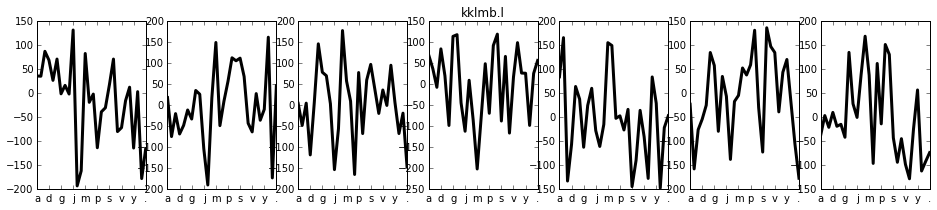

In [310]:
fh = figure(figsize=(16,3))
fh.clf()
cols = get_cmap('copper', n_steps)
xv = arange(0, len(alph), 3)
alphabet = np.array(list(alph))
lv = alphabet[xv]

ax1=fh.add_subplot(171)
ax2=fh.add_subplot(172)
ax3=fh.add_subplot(173)
ax4=fh.add_subplot(174)
ax5=fh.add_subplot(175)
ax6=fh.add_subplot(176)
ax7=fh.add_subplot(177)

ax1.set_xticks(xv)
ax1.set_xticklabels(lv)

ax2.set_xticks(xv)
ax2.set_xticklabels(lv)

ax3.set_xticks(xv)
ax3.set_xticklabels(lv)

ax4.set_xticks(xv)
ax4.set_xticklabels(lv)

ax5.set_xticks(xv)
ax5.set_xticklabels(lv)

ax6.set_xticks(xv)
ax6.set_xticklabels(lv)

ax7.set_xticks(xv)
ax7.set_xticklabels(lv)
    

ax1.plot(l1_coef_hist[0,:], lw=3, c=cols(0))
ax2.plot(l2_coef_hist[0,:], lw=3, c=cols(0))
ax3.plot(l3_coef_hist[0,:], lw=3, c=cols(0))
ax4.plot(l4_coef_hist[0,:], lw=3, c=cols(0))
ax5.plot(l5_coef_hist[0,:], lw=3, c=cols(0))
ax6.plot(l6_coef_hist[0,:], lw=3, c=cols(0))
ax7.plot(l7_coef_hist[0,:], lw=3, c=cols(0))


l1 = alph[np.argmax(np.abs(l1_coef_hist[0,:]))]
l2 = alph[np.argmax(np.abs(l2_coef_hist[0,:]))]
l3 = alph[np.argmax(np.abs(l3_coef_hist[0,:]))]
l4 = alph[np.argmax(np.abs(l4_coef_hist[0,:]))]
l5 = alph[np.argmax(np.abs(l5_coef_hist[0,:]))]
l6 = alph[np.argmax(np.abs(l6_coef_hist[0,:]))]
l7 = alph[np.argmax(np.abs(l7_coef_hist[0,:]))]

result = l1+l2+l3+l4+l5+l6+l7
ax4.set_title(result)



In [311]:
def animate(i):
    #tstart =time.time()

    #ax1.clear()
    #ax2.clear()
    #ax3.clear()
    #ax4.clear()
    #ax5.clear()
    #ax6.clear()
    #ax7.clear()
    
    ax1.plot(l1_coef_hist[i,:], lw=3, c=cols(i))
    ax2.plot(l2_coef_hist[i,:], lw=3, c=cols(i))
    ax3.plot(l3_coef_hist[i,:], lw=3, c=cols(i))
    ax4.plot(l4_coef_hist[i,:], lw=3, c=cols(i))
    ax5.plot(l5_coef_hist[i,:], lw=3, c=cols(i))
    ax6.plot(l6_coef_hist[i,:], lw=3, c=cols(i))
    ax7.plot(l7_coef_hist[i,:], lw=3, c=cols(i))

    
    l1 = alph[np.argmax(np.abs(l1_coef_hist[i,:]))]
    l2 = alph[np.argmax(np.abs(l2_coef_hist[i,:]))]
    l3 = alph[np.argmax(np.abs(l3_coef_hist[i,:]))]
    l4 = alph[np.argmax(np.abs(l4_coef_hist[i,:]))]
    l5 = alph[np.argmax(np.abs(l5_coef_hist[i,:]))]
    l6 = alph[np.argmax(np.abs(l6_coef_hist[i,:]))]
    l7 = alph[np.argmax(np.abs(l7_coef_hist[i,:]))]

    result = l1+l2+l3+l4+l5+l6+l7
    ax4.set_title(result)
    print i,

tanim = time.time()
anim = animation.FuncAnimation(fh, animate, frames=300, blit=False)
fname = 'resonance_animation-'  + words[idx] + '-N='  + str(N) + '-M=' + str(M) + '-n' + time.strftime('%y%m%d') + '.mp4'
print fname
anim.save(fname, fps=10, extra_args=['-vcodec', 'libx264'])

print ('\ntotal time: %2.2f ms' % (1000*(time.time() - tanim)))


0 resonance_animation-leap-N=200000-M=900-n170124.mp4
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 

In [315]:
def animate_cl(i):
    #tstart =time.time()

    ax1.clear()
    ax2.clear()
    ax3.clear()
    ax4.clear()
    ax5.clear()
    ax6.clear()
    ax7.clear()
    
    ax1.plot(-l1_coef_hist[i,:], lw=3, c=cols(i))
    ax2.plot(-l2_coef_hist[i,:], lw=3, c=cols(i))
    ax3.plot(-l3_coef_hist[i,:], lw=3, c=cols(i))
    ax4.plot(-l4_coef_hist[i,:], lw=3, c=cols(i))
    ax5.plot(-l5_coef_hist[i,:], lw=3, c=cols(i))
    ax6.plot(-l6_coef_hist[i,:], lw=3, c=cols(i))
    ax7.plot(-l7_coef_hist[i,:], lw=3, c=cols(i))

    
    l1 = alph[np.argmax(np.abs(l1_coef_hist[i,:]))]
    l2 = alph[np.argmax(np.abs(l2_coef_hist[i,:]))]
    l3 = alph[np.argmax(np.abs(l3_coef_hist[i,:]))]
    l4 = alph[np.argmax(np.abs(l4_coef_hist[i,:]))]
    l5 = alph[np.argmax(np.abs(l5_coef_hist[i,:]))]
    l6 = alph[np.argmax(np.abs(l6_coef_hist[i,:]))]
    l7 = alph[np.argmax(np.abs(l7_coef_hist[i,:]))]

    #result = l1+l2+l3+l4+l5+l6+l7
    #ax4.set_title(result)
    
    ax1.set_title(l1)
    ax2.set_title(l2)
    ax3.set_title(l3)
    ax4.set_title(l4)
    ax5.set_title(l5)
    ax6.set_title(l6)
    ax7.set_title(l7)
    
    ax1.set_xticks(xv)
    ax1.set_xticklabels(lv)
    ax1.set_yticks([])

    ax2.set_xticks(xv)
    ax2.set_xticklabels(lv)
    ax2.set_yticks([])

    ax3.set_xticks(xv)
    ax3.set_xticklabels(lv)
    ax3.set_yticks([])
    
    ax4.set_xticks(xv)
    ax4.set_xticklabels(lv)
    ax4.set_yticks([])
    
    ax5.set_xticks(xv)
    ax5.set_xticklabels(lv)
    ax5.set_yticks([])
    
    ax6.set_xticks(xv)
    ax6.set_xticklabels(lv)
    ax6.set_yticks([])
    
    ax7.set_xticks(xv)
    ax7.set_xticklabels(lv)
    ax7.set_yticks([])
    
    ax1.set_xlim([0, len(alph)])
    ax1.set_ylim([-300, 400])
    ax2.set_xlim([0, len(alph)])
    ax2.set_ylim([-300, 400])
    ax3.set_xlim([0, len(alph)])
    ax3.set_ylim([-300, 400])
    ax4.set_xlim([0, len(alph)])
    ax4.set_ylim([-300, 400])
    ax5.set_xlim([0, len(alph)])
    ax5.set_ylim([-300, 400])
    ax6.set_xlim([0, len(alph)])
    ax6.set_ylim([-300, 400])
    ax7.set_xlim([0, len(alph)])
    ax7.set_ylim([-300, 400])
    
    
    print i,

tanim = time.time()
anim = animation.FuncAnimation(fh, animate_cl, frames=300, blit=False)
#display_animation(anim)
fname = 'resonance_animation-clear-t3-'  + words[idx] + '-N='  + str(N) + '-M=' + str(M) + '-n' + time.strftime('%y%m%d') + '.mp4'
print fname
anim.save(fname, fps=10, extra_args=['-vcodec', 'libx264'])
print ('\ntotal time: %2.2f ms' % (1000*(time.time() - tanim)))


0 resonance_animation-clear-t3-leap-N=200000-M=900-n170124.mp4
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

leaped.
res_example-leap-N=200000-M=900-n170124


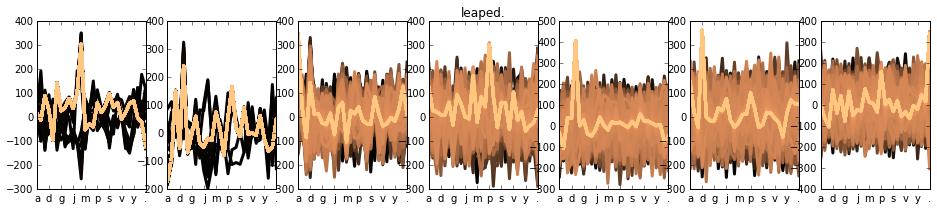

In [312]:
figure(figsize=(16,3))
cols = get_cmap('copper', n_steps)
xv = arange(0, len(alph), 3)
alphabet = np.array(list(alph))
lv = alphabet[xv]

for i in range(n_steps):
    ax=subplot(171)
    plot(-l1_coef_hist[i,:], lw=3, c=cols(i))
    ax.set_xticks(xv)
    ax.set_xticklabels(lv)
    
    ax=subplot(172)
    plot(-l2_coef_hist[i,:], lw=3, c=cols(i))
    ax.set_xticks(xv)
    ax.set_xticklabels(lv)

    ax=subplot(173)
    plot(-l3_coef_hist[i,:], lw=3, c=cols(i))
    ax.set_xticks(xv)
    ax.set_xticklabels(lv)
    
    ax=subplot(174)
    plot(-l4_coef_hist[i,:], lw=3, c=cols(i))
    ax.set_xticks(xv)
    ax.set_xticklabels(lv)

    ax=subplot(175)
    plot(-l5_coef_hist[i,:], lw=3, c=cols(i))
    ax.set_xticks(xv)
    ax.set_xticklabels(lv)
    
    ax=subplot(176)
    plot(-l6_coef_hist[i,:], lw=3, c=cols(i))
    ax.set_xticks(xv)
    ax.set_xticklabels(lv)

    ax=subplot(177)
    plot(-l7_coef_hist[i,:], lw=3, c=cols(i))
    ax.set_xticks(xv)
    ax.set_xticklabels(lv)
    
    
    
l1 = alph[np.argmax(np.abs(l1_coef_hist[-1,:]))]
l2 = alph[np.argmax(np.abs(l2_coef_hist[-1,:]))]
l3 = alph[np.argmax(np.abs(l3_coef_hist[-1,:]))]
l4 = alph[np.argmax(np.abs(l4_coef_hist[-1,:]))]
l5 = alph[np.argmax(np.abs(l5_coef_hist[-1,:]))]
l6 = alph[np.argmax(np.abs(l6_coef_hist[-1,:]))]
l7 = alph[np.argmax(np.abs(l7_coef_hist[-1,:]))]

result = l1+l2+l3+l4+l5+l6+l7
print result

subplot(174)
title(result)

fname = 'res_example-' + words[idx] + '-N='  + str(N) + '-M=' + str(M) + '-n' + time.strftime('%y%m%d')
print fname

savefig(fname + '.eps', format='eps', transparent=True)
savefig(fname + '.png', format='png', transparent=True)


In [141]:
irreg = read_csv("wickle_train/irregular_verbs.csv")
irreg_past_tense, irreg_words = [], []
for row in irreg:
    irreg_words.append(row[0])
    irreg_past_tense.append(row[1])
    
test_irreg_past_tense = irreg_past_tense[:30]
test_irreg_words = irreg_words[:30]

irreg_past_tense = irreg_past_tense[30:]
irreg_words = irreg_words[30:]

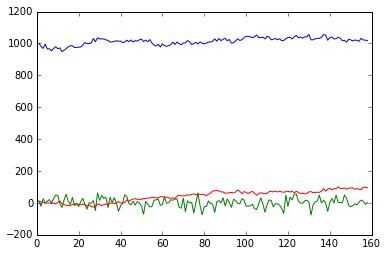

In [5]:
# train and test with only irregular verbs
irreg_encoded = encodes(irreg_words, irreg_past_tense)
test_irreg_encoded = encodes(test_irreg_words, test_irreg_past_tense)

graph(perceptron_map_train, irreg_encoded, test_irreg_encoded)

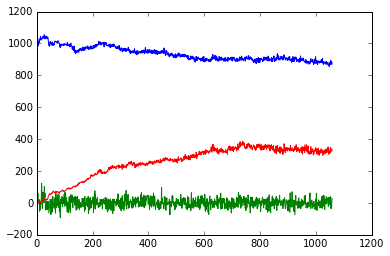

In [6]:
# train and test appended to regular verbs
encoded += irreg_encoded
test_encoded += test_irreg_encoded
graph(perceptron_map_train, encoded, test_encoded)